# IA340 Mini Project
**Project Title:** Crime Data Since 2020 in Las Angeles

## Research Question
Does victim age or gender correlate with certain types of crime or amount of crime?

## Dataset Documentation
- **Source:** https://catalog.data.gov/dataset/
- **Description:** Crime data in Las Angeles
- **Time Period:** 2020-Present (as of 10/4/25)
- **Reason for Choice:** The dataset includes data on demographics such as age and gender of victims that correlate with my research question.

In [1]:
import boto3
import pandas as pd

# Replace with your S3 bucket and file name
bucket_name = 'ia-340-2025-fall-monsenca'
file_key = 'Crime_Data_from_2020_to_Present.csv'

# Download file from your private bucket to the notebook instance
s3 = boto3.client('s3')
s3.download_file(bucket_name, file_key, 'Crime_Data_from_2020_to_Present.csv')

# Read it with pandas
df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# Preview
df.head()


/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211507896,04/11/2021 12:00:00 AM,11/07/2020 12:00:00 AM,845,15,N Hollywood,1502,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,7800 BEEMAN AV,NaN,34.2124,-118.4092
1,201516622,10/21/2020 12:00:00 AM,10/18/2020 12:00:00 AM,1845,15,N Hollywood,1521,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,ATOLL AV,N GAULT,34.1993,-118.4203
2,240913563,12/10/2024 12:00:00 AM,10/30/2020 12:00:00 AM,1240,9,Van Nuys,933,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,14600 SYLVAN ST,NaN,34.1847,-118.4509
3,210704711,12/24/2020 12:00:00 AM,12/24/2020 12:00:00 AM,1310,7,Wilshire,782,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,...,IC,Invest Cont,331.0,NaN,NaN,NaN,6000 COMEY AV,NaN,34.0339,-118.3747
4,201418201,10/03/2020 12:00:00 AM,09/29/2020 12:00:00 AM,1830,14,Pacific,1454,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,4700 LA VILLA MARINA,NaN,33.9813,-118.4350


This cell successfully loads in the dataset.

## Data Cleaning

In [2]:
import pandas as pd

df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

# View column names
print(df.columns)

# Drop duplicates
df = df.drop_duplicates()

# Drop rows where 'Crm Cd Desc' is missing
df = df.dropna(subset=['Crm Cd Desc'])

# Check how many rows remain
df.info()


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   C

In [3]:
df = df.dropna(axis=1, thresh=0.5*len(df))  # Drop columns with >50% nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 22 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DR_NO         1004991 non-null  int64  
 1   Date Rptd     1004991 non-null  object 
 2   DATE OCC      1004991 non-null  object 
 3   TIME OCC      1004991 non-null  int64  
 4   AREA          1004991 non-null  int64  
 5   AREA NAME     1004991 non-null  object 
 6   Rpt Dist No   1004991 non-null  int64  
 7   Part 1-2      1004991 non-null  int64  
 8   Crm Cd        1004991 non-null  int64  
 9   Crm Cd Desc   1004991 non-null  object 
 10  Mocodes       853372 non-null   object 
 11  Vict Age      1004991 non-null  int64  
 12  Vict Sex      860347 non-null   object 
 13  Vict Descent  860335 non-null   object 
 14  Premis Cd     1004975 non-null  float64
 15  Premis Desc   1004403 non-null  object 
 16  Status        1004990 non-null  object 
 17  Status Desc   1004991 non-n

In [4]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852560 entries, 0 to 1004990
Data columns (total 22 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DR_NO         852560 non-null  int64  
 1   Date Rptd     852560 non-null  object 
 2   DATE OCC      852560 non-null  object 
 3   TIME OCC      852560 non-null  int64  
 4   AREA          852560 non-null  int64  
 5   AREA NAME     852560 non-null  object 
 6   Rpt Dist No   852560 non-null  int64  
 7   Part 1-2      852560 non-null  int64  
 8   Crm Cd        852560 non-null  int64  
 9   Crm Cd Desc   852560 non-null  object 
 10  Mocodes       852560 non-null  object 
 11  Vict Age      852560 non-null  int64  
 12  Vict Sex      852560 non-null  object 
 13  Vict Descent  852560 non-null  object 
 14  Premis Cd     852560 non-null  float64
 15  Premis Desc   852560 non-null  object 
 16  Status        852560 non-null  object 
 17  Status Desc   852560 non-null  object 
 18  Crm Cd 1

### Data Cleaning Description
For the cleaning process of this dataset I started with dropping the duplicates. I then dropped the columns that had consisted of more than 50% null values, which was 6 columns. This way I could then drop all the rows with null values without deleting the majority of the data. I ended up cutting out around 150,000 rows which was fine because I still have around 850,000 left to work with.

## Data Processing

In [5]:
import pandas as pd

# Convert data types if needed
df['Vict Age'] = pd.to_numeric(df['Vict Age'], errors='coerce')
df['Vict Sex'] = df['Vict Sex'].astype(str).str.upper().str.strip()
df['Crm Cd Desc'] = df['Crm Cd Desc'].astype(str).str.title().str.strip()

# Optional: create age groups
bins = [0, 12, 17, 24, 34, 44, 54, 64, 74, 84, 120]
labels = ['Child','Teen','18–24','25–34','35–44','45–54','55–64','65–74','75–84','85+']
df['AgeGroup'] = pd.cut(df['Vict Age'], bins=bins, labels=labels, right=False)

# Check the processed columns
df[['Vict Age', 'AgeGroup', 'Vict Sex', 'Crm Cd Desc']].head()


,Vict Age,AgeGroup,Vict Sex,Crm Cd Desc
0,31,25–34,M,Theft Of Identity
1,32,25–34,M,"Assault With Deadly Weapon, Aggravated Assault"
2,30,25–34,M,Theft Of Identity
3,47,45–54,F,Theft From Motor Vehicle - Grand ($950.01 And ...
4,63,55–64,M,Theft From Motor Vehicle - Petty ($950 & Under)


### Data Processing Description
For the data processing portion of this project I transformed the data to prepare for analysis of how victim age and gender relate to different crime types. I did this by changing the data types of the columns that I am using, and then created age groups to use the age varible more easily.


## Query

In [25]:
q1_sql = """
SELECT
    CASE
        WHEN "Vict Age" BETWEEN 0 AND 12 THEN 'Child'
        WHEN "Vict Age" BETWEEN 13 AND 17 THEN 'Teen'
        WHEN "Vict Age" BETWEEN 18 AND 24 THEN '18–24'
        WHEN "Vict Age" BETWEEN 25 AND 34 THEN '25–34'
        WHEN "Vict Age" BETWEEN 35 AND 44 THEN '35–44'
        WHEN "Vict Age" BETWEEN 45 AND 54 THEN '45–54'
        WHEN "Vict Age" BETWEEN 55 AND 64 THEN '55–64'
        WHEN "Vict Age" BETWEEN 65 AND 74 THEN '65–74'
        WHEN "Vict Age" BETWEEN 75 AND 84 THEN '75–84'
        ELSE '85+'
    END AS AgeGroup,
    "Vict Sex",
    "Crm Cd Desc",
    COUNT(*) AS crime_count
FROM Crime_Data
WHERE "Vict Age" IS NOT NULL
  AND "Vict Sex" IN ('M', 'F')
GROUP BY AgeGroup, "Vict Sex", "Crm Cd Desc"
ORDER BY AgeGroup, "Vict Sex", crime_count DESC;
"""

In [28]:
import sqlite3
import pandas as pd

# Connect to SQLite (creates crime.db if it doesn’t exist)
conn = sqlite3.connect("crime.db")

# Load your CSV into a table named Crime_Data
df = pd.read_csv("Crime_Data_from_2020_to_Present.csv")
df.to_sql("Crime_Data", conn, if_exists="replace", index=False)

# Now you can safely run your query
q1_df = pd.read_sql(q1_sql, con=conn)
q1_df.head()


,AgeGroup,Vict Sex,Crm Cd Desc,crime_count
0,18–24,F,INTIMATE PARTNER - SIMPLE ASSAULT,6657
1,18–24,F,BATTERY - SIMPLE ASSAULT,4664
2,18–24,F,BURGLARY FROM VEHICLE,3438
3,18–24,F,THEFT PLAIN - PETTY ($950 & UNDER),3230
4,18–24,F,THEFT OF IDENTITY,3195


### Query Description
The query is here to give a demographic breakdown of crimes, and identifies which age and sex groups are most affected by specific crime types.

## Visualizations

/tmp/ipykernel_6689/344239025.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_totals = result.groupby(['AgeGroup', 'Vict Sex'])['crime_count'].sum().unstack()


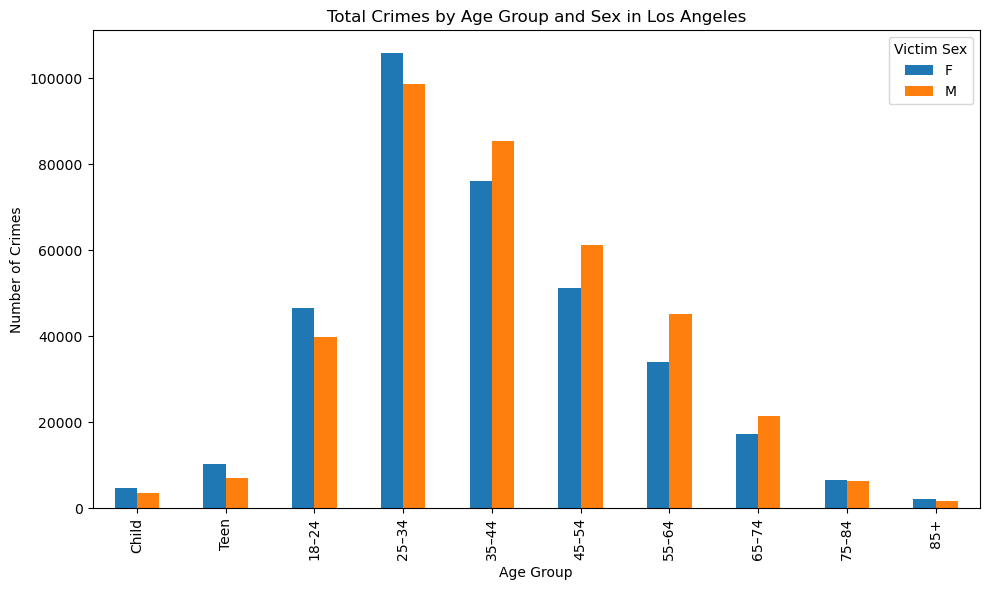

In [33]:
import matplotlib.pyplot as plt

# Sum by age and sex
age_sex_totals = result.groupby(['AgeGroup', 'Vict Sex'])['crime_count'].sum().unstack()

# Plot
age_sex_totals.plot(kind='bar', figsize=(10,6))
plt.title('Total Crimes by Age Group and Sex in Los Angeles')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.legend(title='Victim Sex')
plt.tight_layout()
plt.show()


### Total Crimes by Age Group and Sex in Las Angeles Descritpion
The visualization shows the number of crimes on the y axis and age group on the x axis. 

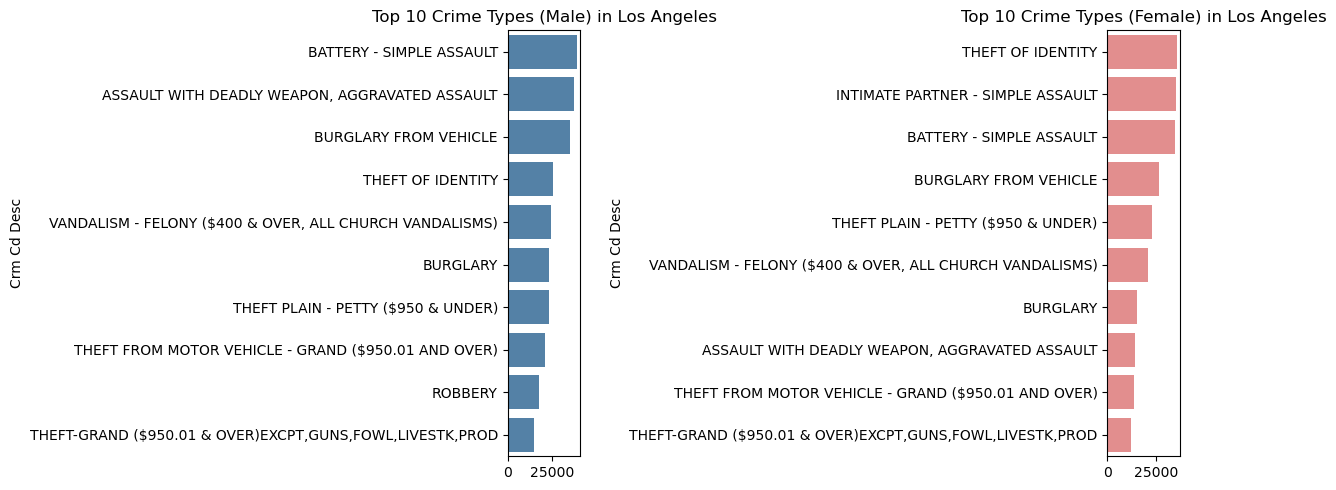

In [34]:
import seaborn as sns

# Get top 10 crimes for each sex
top_male = result[result['Vict Sex'] == 'M'].groupby('Crm Cd Desc')['crime_count'].sum().nlargest(10)
top_female = result[result['Vict Sex'] == 'F'].groupby('Crm Cd Desc')['crime_count'].sum().nlargest(10)

# Combine and plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=top_male.values, y=top_male.index, color='steelblue')
plt.title('Top 10 Crime Types (Male) in Los Angeles')

plt.subplot(1,2,2)
sns.barplot(x=top_female.values, y=top_female.index, color='lightcoral')
plt.title('Top 10 Crime Types (Female) in Los Angeles')
plt.tight_layout()
plt.show()
